In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("housing.csv")

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
df["income_cat"] = pd.cut(df["median_income"] , bins = [0 , 2, 4, 6, 8 , np.inf] ,labels = ["very poor" , "poor" , "middle class" , "rich" , "very rich"] )
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very rich
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,very rich
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,rich
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,middle class
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,poor
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,very poor
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,poor
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,very poor
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,very poor


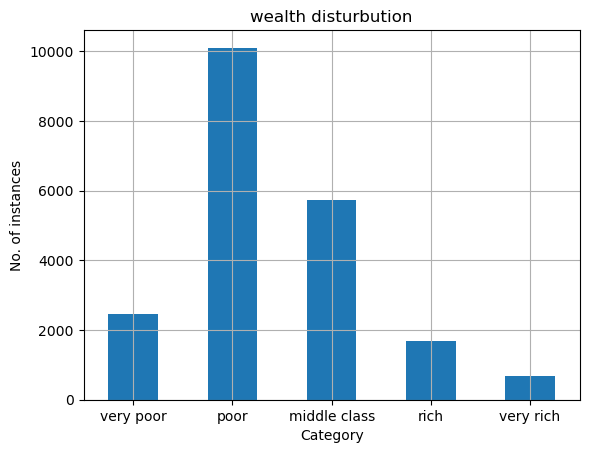

In [25]:
import matplotlib.pyplot as plt
df["income_cat"].value_counts().sort_index().plot.bar(rot = 0 , grid = True)
plt.ylabel("No. of instances")
plt.xlabel("Category")
plt.title("wealth disturbution")
plt.show()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
split = StratifiedShuffleSplit( n_splits = 1 , test_size = 0.2 , random_state  = 42)

for train_index , test_index in split.split(df , df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    

In [36]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very rich
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,very rich
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,rich
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,middle class
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,poor
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,very poor
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,poor
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,very poor
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,very poor


In [39]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
7892,-118.07,33.88,18.0,2436.0,375.0,1303.0,386.0,6.1968,344700.0,<1H OCEAN,rich
18094,-122.06,37.34,13.0,2057.0,466.0,790.0,436.0,5.0081,288300.0,<1H OCEAN,middle class
19420,-121.18,37.64,43.0,1244.0,209.0,611.0,197.0,2.8750,187500.0,INLAND,poor
45,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,182300.0,NEAR BAY,poor
12004,-117.56,33.89,16.0,693.0,185.0,365.0,176.0,2.3417,191700.0,INLAND,poor
...,...,...,...,...,...,...,...,...,...,...,...
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833,197300.0,<1H OCEAN,middle class
4141,-118.19,34.13,50.0,1309.0,302.0,883.0,293.0,3.1287,198000.0,<1H OCEAN,poor
4930,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,98500.0,<1H OCEAN,very poor
2522,-122.38,39.68,21.0,1155.0,210.0,510.0,175.0,2.3851,67500.0,INLAND,poor


In [40]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17600,-121.90,37.30,52.0,1456.0,269.0,582.0,277.0,5.0360,296600.0,<1H OCEAN,middle class
15078,-116.97,32.83,23.0,149.0,32.0,101.0,34.0,2.6458,112500.0,<1H OCEAN,poor
15986,-122.47,37.76,48.0,2064.0,484.0,1055.0,467.0,2.8711,329600.0,NEAR BAY,poor
4864,-118.28,34.04,19.0,460.0,241.0,890.0,229.0,1.6089,162500.0,<1H OCEAN,very poor
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,245300.0,<1H OCEAN,middle class
...,...,...,...,...,...,...,...,...,...,...,...
8811,-118.31,33.76,26.0,4486.0,709.0,1873.0,719.0,6.5704,414700.0,<1H OCEAN,rich
6631,-118.16,34.16,44.0,1284.0,278.0,925.0,261.0,1.7321,178400.0,<1H OCEAN,very poor
14108,-117.11,32.75,20.0,1667.0,469.0,1292.0,445.0,2.0893,101100.0,NEAR OCEAN,poor
10619,-117.82,33.68,3.0,3068.0,494.0,1357.0,486.0,7.9187,333600.0,<1H OCEAN,rich


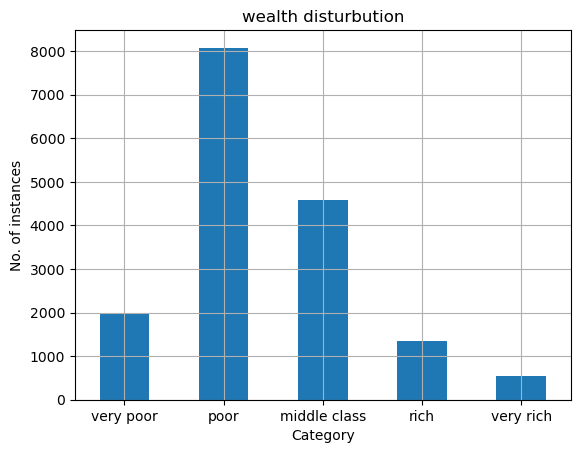

In [42]:
import matplotlib.pyplot as plt
strat_train_set["income_cat"].value_counts().sort_index().plot.bar(rot = 0 , grid = True)
plt.ylabel("No. of instances")
plt.xlabel("Category")
plt.title("wealth disturbution")
plt.show()

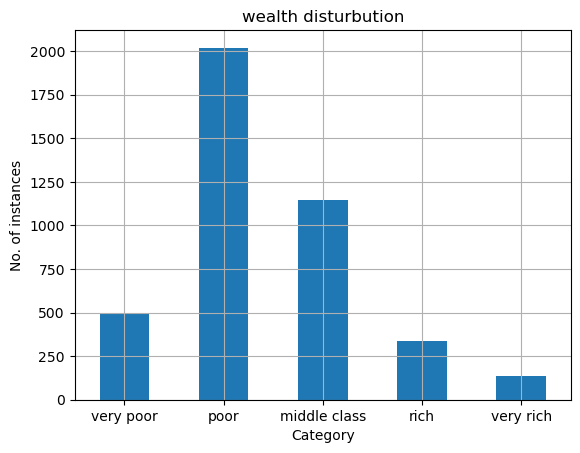

In [43]:
import matplotlib.pyplot as plt
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot = 0 , grid = True)
plt.ylabel("No. of instances")
plt.xlabel("Category")
plt.title("wealth disturbution")
plt.show()